Shape of dataset: (150, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
Attributes: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5  

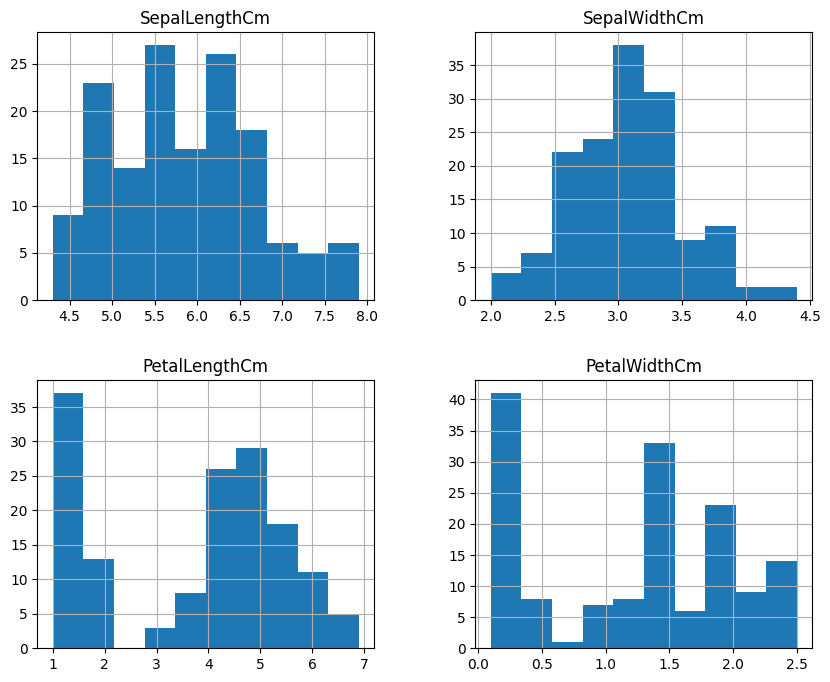

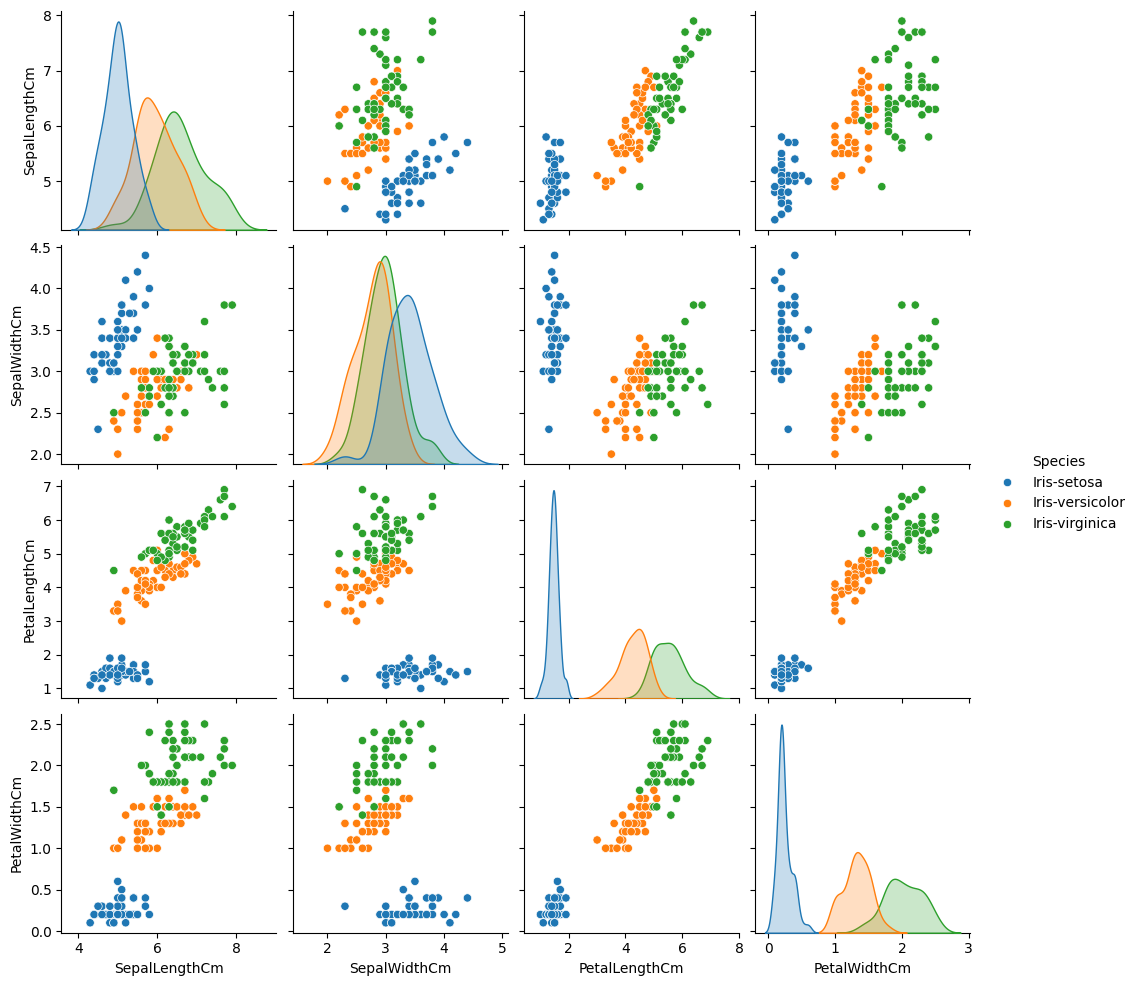

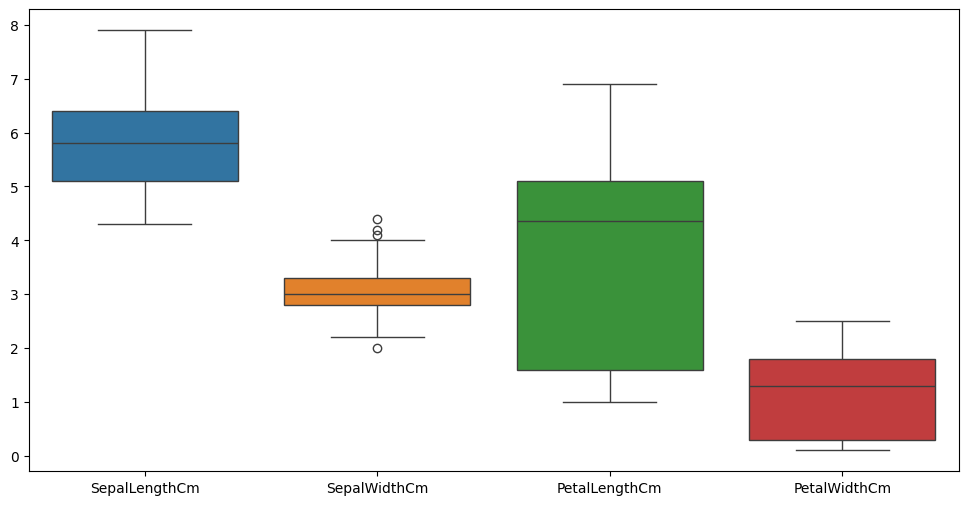

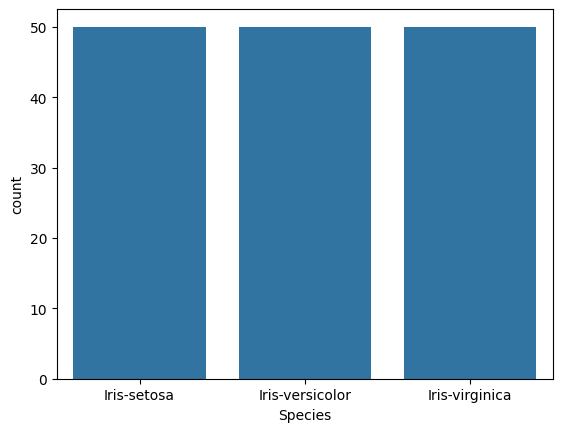

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0
Cross-validation scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]
Mean CV accuracy: 0.9800000000000001
Best parameters: {'C': 1, 'kernel': 'linear'}
Best estimator: SVC(C=1, kernel='linear')
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        3

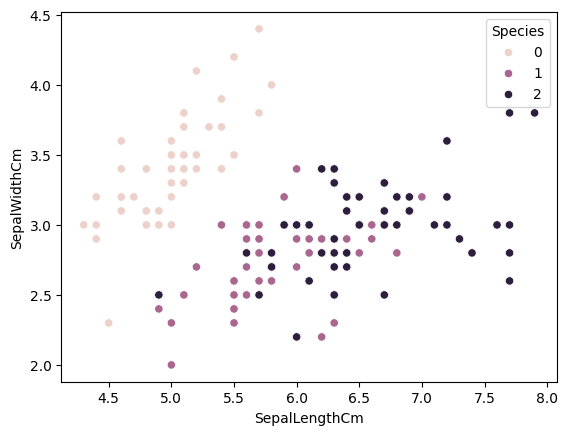

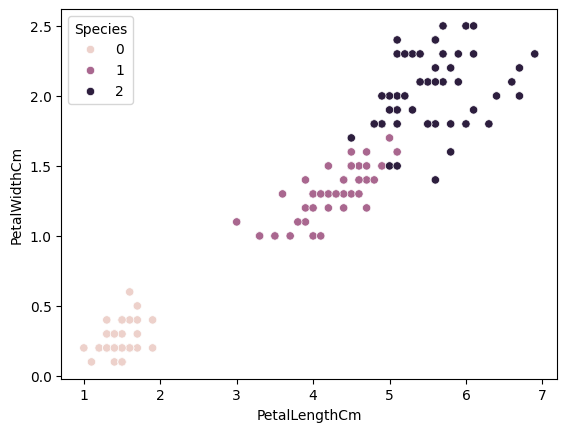

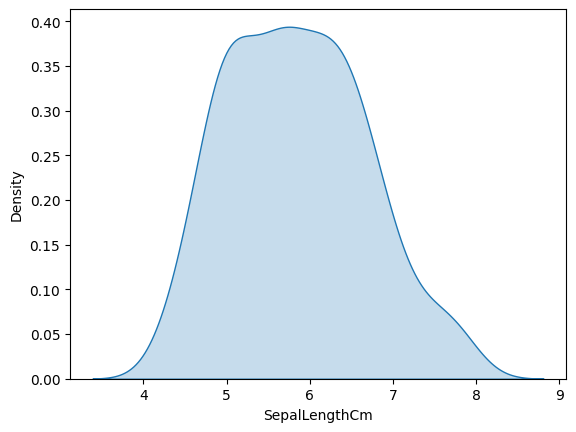

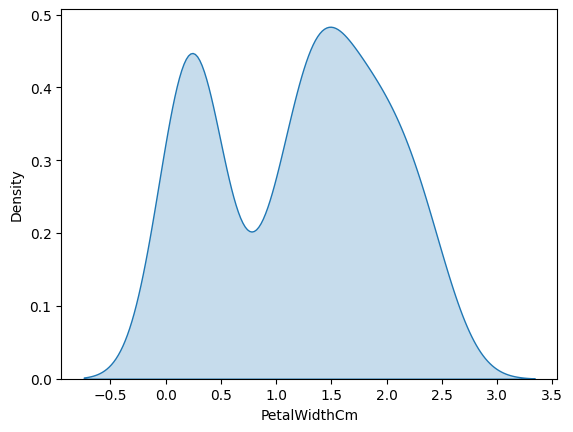

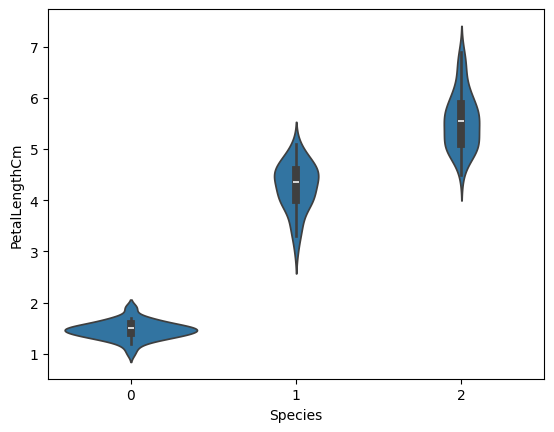

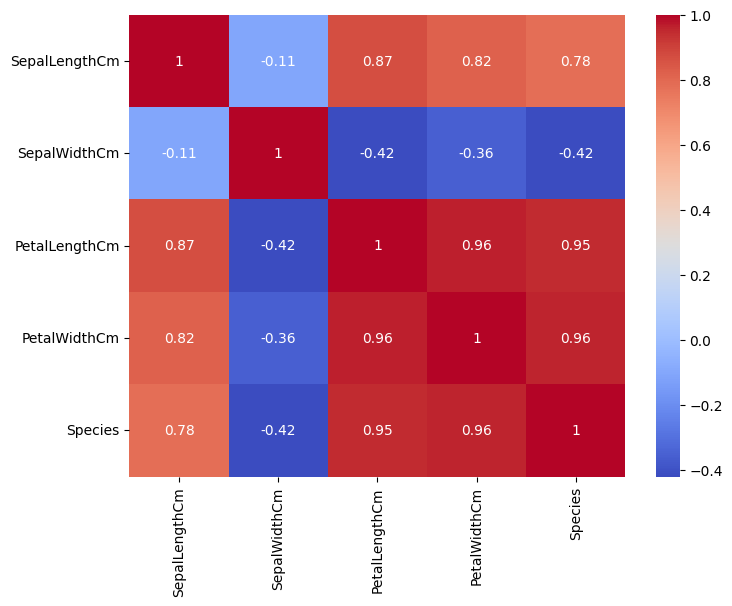

The Support Vector Machine classifier achieved high accuracy in classifying the Iris dataset, with further improvement using hyperparameter tuning.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# 1. Load dataset
df = pd.read_csv('Iris.csv')

# 2. Print number of rows and columns
print("Shape of dataset:", df.shape)

# 3. Print dataframe info
df.info()

# 4. Print attribute names
print("Attributes:", df.columns.tolist())

# 5. Display first five records
print(df.head())

# 6. Describe dataset
print(df.describe())

# 7. Check for missing values
print(df.isnull().sum())

# 8. Drop ID column
df = df.drop(columns=['Id'])

# 9. Plot histograms
df.hist(figsize=(10, 8))
plt.show()

# 10. Pair plot
sns.pairplot(df, hue='Species')
plt.show()

# 11. Boxplot for each feature
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.show()

# 12. Countplot of species
sns.countplot(x=df['Species'])
plt.show()

# 13. Encode target labels
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

# 14. Split data into training and testing sets
X = df.drop(columns=['Species'])
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 15. Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# 16. Make predictions
y_pred = svm_model.predict(X_test)

# 17. Display confusion matrix
print(confusion_matrix(y_test, y_pred))

# 18. Display classification report
print(classification_report(y_test, y_pred))

# 19. Compute accuracy score
accuracy = svm_model.score(X_test, y_test)
print("Accuracy:", accuracy)

# 20. Perform 5-fold cross-validation
cv_scores = cross_val_score(svm_model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# 21. Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 22. Best parameters
print("Best parameters:", grid_search.best_params_)

# 23. Best estimator
print("Best estimator:", grid_search.best_estimator_)

# 24. Train optimized model
best_model = grid_search.best_estimator_

# 25. Predict using best model
y_pred_best = best_model.predict(X_test)

# 26. Display new confusion matrix
print(confusion_matrix(y_test, y_pred_best))

# 27. Display new classification report
print(classification_report(y_test, y_pred_best))

# 28. Compute new accuracy
print("Optimized Model Accuracy:", best_model.score(X_test, y_test))

# 29. Compare initial and optimized accuracy
print("Initial Accuracy:", accuracy)
print("Optimized Accuracy:", best_model.score(X_test, y_test))

# 30. Scatter plot of Sepal Length vs Sepal Width
sns.scatterplot(x=df['SepalLengthCm'], y=df['SepalWidthCm'], hue=df['Species'])
plt.show()

# 31. Scatter plot of Petal Length vs Petal Width
sns.scatterplot(x=df['PetalLengthCm'], y=df['PetalWidthCm'], hue=df['Species'])
plt.show()

# 32. KDE plot of Sepal Length
sns.kdeplot(df['SepalLengthCm'], fill=True)
plt.show()

# 33. KDE plot of Petal Width
sns.kdeplot(df['PetalWidthCm'], fill=True)
plt.show()

# 34. Violin plot of Petal Length by Species
sns.violinplot(x=df['Species'], y=df['PetalLengthCm'])
plt.show()

# 35. Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# 36. Conclusion
print("The Support Vector Machine classifier achieved high accuracy in classifying the Iris dataset, with further improvement using hyperparameter tuning.")
